# 1st Project #

## Project Name  : Linear regression analysis and prediction of real estate prices ##

### Steps ###
1. Collect and preprocess the data. Reprocess the data by cleaning it, handling missing values, and possibly performing some feature engineering or scaling.
2. Split the data into training and testing sets.
3. Choose a linear regression model and fit it to the training data.
4. Evaluate the model's performance on the testing data. Calculate metrics such as mean squared error (MSE) or mean absolute error (MAE) to understand how well the model is able to predict the target variable.
5. Fine-tune the model as needed, you may need to try different models, adjust the model hyperparameters, or add more data to the training set.
6. Deploy the model in a production environment. This may involve integrating the model into a web application or other system that allows users to input the predictor variables and receive a prediction   for the target variable.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [207]:
# Collect and preprocess the data
import pandas as pd

real_estate_prices = pd.read_csv('real_estate.csv')
real_estate_prices


,No,X1_transaction_date,X2_house_age,X3_distance_nearest_MRT,X4_nbr_convenience_stores,X5_lat,X6_lon,Y_house_price_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [208]:
real_estate_prices.corr()["Y_house_price_unit_area"]

No                          -0.028587
X1_transaction_date          0.087491
X2_house_age                -0.210567
X3_distance_nearest_MRT     -0.673613
X4_nbr_convenience_stores    0.571005
X5_lat                       0.546307
X6_lon                       0.523287
Y_house_price_unit_area      1.000000
Name: Y_house_price_unit_area, dtype: float64

In [209]:
real_estate_prices = real_estate_prices[["X1_transaction_date", "X3_distance_nearest_MRT", "X5_lat", "X6_lon", "Y_house_price_unit_area"]]

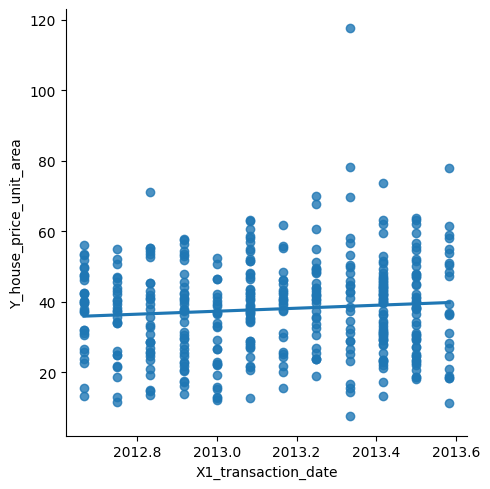

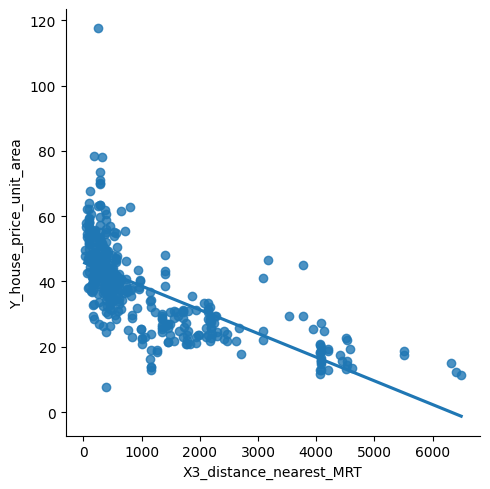

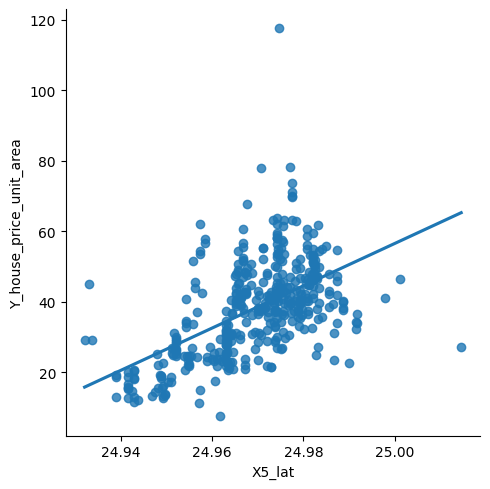

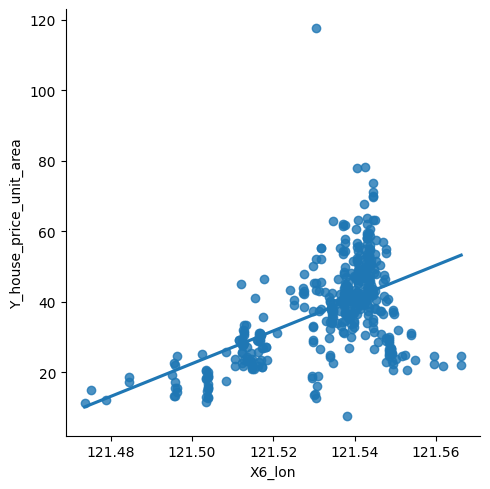

In [210]:
import seaborn as sns
date_price = sns.lmplot(x = "X1_transaction_date", y = "Y_house_price_unit_area", data = real_estate_prices, fit_reg=True, ci = None)
MRT_price = sns.lmplot(x = "X3_distance_nearest_MRT", y = "Y_house_price_unit_area", data = real_estate_prices, fit_reg=True, ci = None)
lat_price = sns.lmplot(x = "X5_lat", y = "Y_house_price_unit_area", data = real_estate_prices, fit_reg=True, ci = None)
lon_price = sns.lmplot(x = "X6_lon", y = "Y_house_price_unit_area", data = real_estate_prices, fit_reg=True, ci = None)



<AxesSubplot: ylabel='Frequency'>

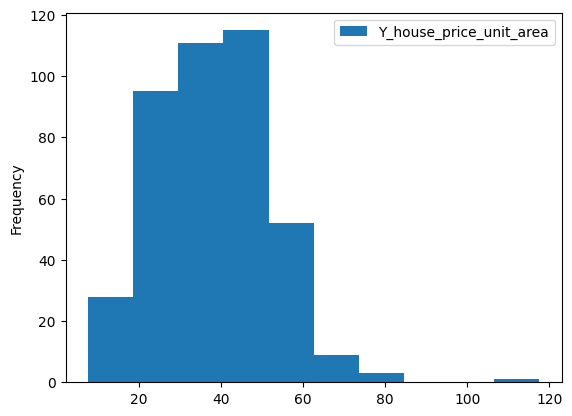

In [211]:
real_estate_prices.plot.hist(y="Y_house_price_unit_area")

In [212]:
train = real_estate_prices[real_estate_prices["X1_transaction_date"] < 2013.2]
test = real_estate_prices[real_estate_prices["X1_transaction_date"] >= 2013.2]


In [213]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [214]:
# Linear regression model
predictors = ["X3_distance_nearest_MRT", "X5_lat", "X6_lon"]
target = ["Y_house_price_unit_area"]

In [215]:
#evaluate the model

reg.fit(train[predictors], train["Y_house_price_unit_area"])

LinearRegression()

In [216]:
predictors = reg.predict(test[predictors])
test["predictions"] = predictors
test["predictions"] = test["predictions"]
test


C:\Users\Nôam\AppData\Local\Temp\ipykernel_14160\2844372552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"] = predictors
C:\Users\Nôam\AppData\Local\Temp\ipykernel_14160\2844372552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"] = test["predictions"]


,X1_transaction_date,X3_distance_nearest_MRT,X5_lat,X6_lon,Y_house_price_unit_area,predictions
2,2013.583,561.98450,24.98746,121.54391,47.3,43.777122
3,2013.500,561.98450,24.98746,121.54391,54.8,43.777122
7,2013.417,287.60250,24.98042,121.54228,46.7,43.880281
8,2013.500,5512.03800,24.95095,121.48458,18.8,6.530529
9,2013.417,1783.18000,24.96731,121.51486,22.1,32.346082
...,...,...,...,...,...,...
400,2013.250,482.75810,24.97433,121.53863,35.5,41.380909
404,2013.333,289.32480,24.98203,121.54348,41.2,44.211604
408,2013.417,2175.74400,24.96330,121.51243,28.1,29.092806
411,2013.250,390.96960,24.97923,121.53986,40.6,43.029154


In [217]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["Y_house_price_unit_area"], test["predictions"])



7.661402179243331

In [218]:
real_estate_prices.describe()["Y_house_price_unit_area"] 

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y_house_price_unit_area, dtype: float64

The standard deviation is 13.606488 and we are, on average 7.6502645502645485 away from reality, we are good

In [219]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["Y_house_price_unit_area"], test["predictions"])


131.0391972670481

In [220]:
test[test["Y_house_price_unit_area"] <=  38.450000 ]

,X1_transaction_date,X3_distance_nearest_MRT,X5_lat,X6_lon,Y_house_price_unit_area,predictions
8,2013.500,5512.0380,24.95095,121.48458,18.8,6.530529
9,2013.417,1783.1800,24.96731,121.51486,22.1,32.346082
14,2013.500,1164.8380,24.99156,121.53406,34.3,41.237291
20,2013.417,2275.8770,24.96314,121.51151,29.3,28.465240
27,2013.250,276.4490,24.95593,121.53913,33.6,38.443451
...,...,...,...,...,...,...
394,2013.500,4136.2710,24.95544,121.49630,24.7,15.692593
397,2013.417,1164.8380,24.99156,121.53406,32.2,41.237291
398,2013.417,1717.1930,24.96447,121.51649,23.0,32.069219
400,2013.250,482.7581,24.97433,121.53863,35.5,41.380909


In [221]:
errors = (test["Y_house_price_unit_area"] - test["predictions"]).abs()
errors

2       3.522878
3      11.022878
7       2.819719
8      12.269471
9      10.246082
         ...    
400     5.880909
404     3.011604
408     0.992806
411     2.429154
413    20.220442
Length: 189, dtype: float64

In [222]:
errors_by_prices = errors.groupby(test["Y_house_price_unit_area"].round()).mean()
errors_by_prices

Y_house_price_unit_area
8.0      31.469025
11.0      8.970732
13.0      2.511353
14.0      2.916477
16.0      3.866217
17.0      7.428295
18.0      7.643127
19.0     10.728193
21.0      9.441316
22.0     10.306149
23.0      8.272947
24.0      7.474490
25.0      6.870877
26.0      6.606313
27.0      5.367203
28.0      1.032758
29.0      7.146043
30.0      2.587529
31.0      3.082799
32.0      8.480175
33.0      6.412641
34.0      6.020349
35.0      3.117605
36.0      5.295607
37.0      3.635389
38.0      3.107813
39.0      3.470019
40.0      1.375492
41.0      3.087498
42.0      1.448192
43.0      1.527658
44.0      1.710848
45.0      7.576872
46.0      2.626464
47.0      6.098182
48.0      5.656539
49.0      6.597428
50.0      6.685001
51.0      7.261275
52.0     10.527027
53.0      8.938396
54.0     12.983062
55.0     12.249017
56.0     13.584505
57.0     15.637846
58.0     14.420442
59.0     15.320442
60.0     15.604419
61.0     17.341110
62.0     20.402951
63.0     20.211785
64.0   

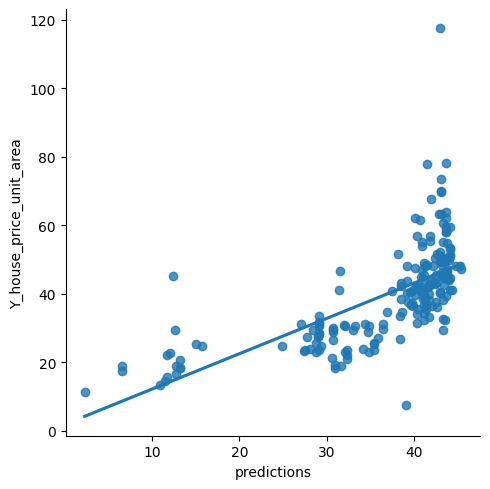

In [223]:
sns.lmplot(x = "predictions", y = "Y_house_price_unit_area", data = test, fit_reg=True, ci = None)

<AxesSubplot: ylabel='Frequency'>

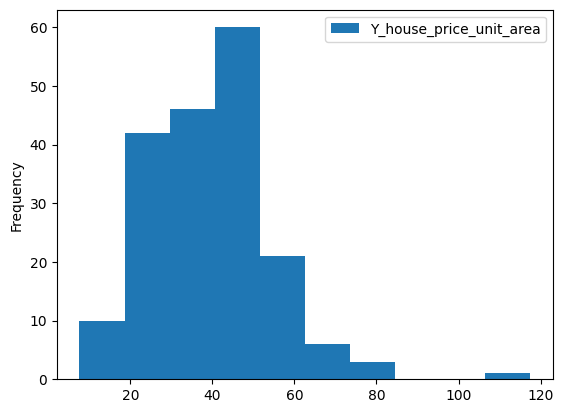

In [224]:
test.plot.hist(y="Y_house_price_unit_area")

<AxesSubplot: ylabel='Frequency'>

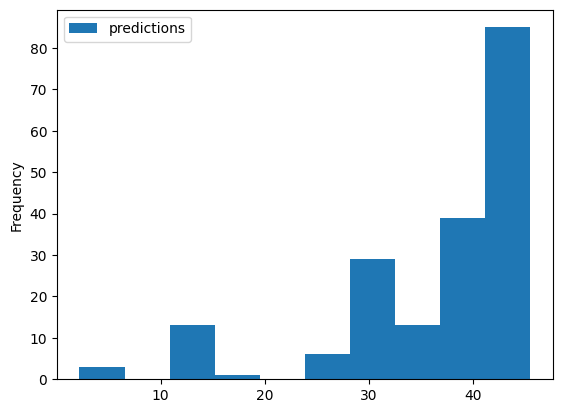

In [225]:
test.plot.hist(y="predictions")